<img src="https://dunia.esa.int/assets/DUNIA_icon-c174c3dd.png" style="margin-left: auto;">
<center> <h1>River Basins over Africa</h1> </center>
<center> <h2>using the HydroSHEDS database</h2> </center>

<br>

## 1 Introduction

Across the vast and varied landscape of Africa, river basins stand as intricate networks, weaving their way through the continent's terrain. These basins are not just geographic features; they are the lifelines of communities, the sustenance of ecosystems, and the drivers of economies. Delineating these river basins is not merely a matter of cartography; it is a fundamental task with profound implications for the well-being of millions.  
  
Delineating them is crucial for  
* managing water resources
* supporting agriculture
* conserving biodiversity
* and fostering transboundary cooperation.
  
It enables sustainable practices, protects habitats, and promotes peace. By understanding and respecting these boundaries, Africa can navigate towards a future of resilience, prosperity, and harmony with its natural environment.

<a id='basins_image'></a>
<center><img src="https://farm1.staticflickr.com/512/32323500286_1493763005_b.jpg"></center>
  
<br>
<br>

Africa is home to several major river basins, each playing a significant role in the continent's ecology, economy, and society. Among the largest basins in Africa are:  

### Congo River Basin
The Congo Basin is the second-largest river basin in the world by area, covering approximately 4 million square kilometers across multiple countries in Central Africa, including the Democratic Republic of the Congo, Republic of the Congo, Central African Republic, Angola, Cameroon, and Zambia. The Congo River, the basin's primary waterway, is one of the longest rivers globally and supports diverse ecosystems, including tropical rainforests and wetlands.

### Nile River Basin
The Nile Basin is the longest river system in the world, stretching over 3.4 million square kilometers across eleven countries in North-East Africa, including Egypt, Sudan, South Sudan, Ethiopia, Uganda, Kenya, Rwanda, Burundi, Tanzania, the Democratic Republic of the Congo, and Eritrea. The Nile River is a vital source of water for irrigation, hydropower generation, and sustenance for millions of people in the region.

### Niger River Basin
The Niger Basin is located in West Africa, covering approximately 2.1 million square kilometers across nine countries, including Guinea, Mali, Niger, Benin, Nigeria, Burkina Faso, Côte d'Ivoire, Cameroon, and Chad. The Niger River, one of the longest rivers in Africa, traverses this basin, supporting agriculture, fishing, transportation, and energy production.

### Zambezi River Basin
The Zambezi Basin is situated in Southern Africa, spanning approximately 1.37 million square kilometers across eight countries, including Zambia, Angola, Namibia, Botswana, Zimbabwe, Mozambique, Malawi, and Tanzania. The Zambezi River is renowned for its iconic Victoria Falls and plays a crucial role in providing water for irrigation, hydropower generation, and wildlife habitats.

### Orange River Basin
The Orange Basin is located in Southern Africa, covering around 1 million square kilometers across four countries, including South Africa, Namibia, Lesotho, and Botswana. The Orange River is the longest river in South Africa, supporting agriculture, mining, and hydroelectric power generation.


### Lake Chad Basin
The Lake Chad Basin, located in Central Africa, spans approximately 2.5 million square kilometers across six countries, including Chad, Cameroon, Nigeria, Niger, Central African Republic, and Libya. While technically not a river basin, Lake Chad and its surrounding wetlands serve as a critical source of water for millions of people, supporting agriculture, fishing, and livestock grazing. However, the lake has been significantly shrinking due to climate change, population growth, and over-extraction of water, leading to environmental degradation and socio-economic challenges for the region. Efforts to sustainably manage and restore the Lake Chad Basin are crucial for the well-being of communities and ecosystems in the area.

__________


## 2 Import Python Modules

In the beginning we need to import the required Python modules.  
Besides basic modules and matplotlib for plotting, we need GeoPandas for handling geodata, more precisely for handling vector data (points, lines and polygons).

In [1]:
# Standard modules
import os
import zipfile
import requests
import pandas as pd
from glob import glob

# Plotting modules
from matplotlib import cm, colormaps, pyplot as plt
from matplotlib.colors import ListedColormap

# Geodata Modules
import geopandas as gpd

__________


## 3 Data Source

This example notebook was derived from Milos Popovic great mapping work which can be found here:
https://github.com/milos-agathon/mapping-river-basins-with-r/blob/main/py/dev/mapMaker.ipynb

Three resources are required to run this notebook:
* Country Borders from GISCO - the Geographic Information System of the COmmission
* Basins (HydroBASINS) from the [HydroSHEDS](https://www.hydrosheds.org/products/hydrobasins) database
* Rivers (HydroRIVERS) from the [HydroSHEDS](https://www.hydrosheds.org/products/hydrorivers) database

Since we are going to download and extract a lot of files, we will create a new working directory and store all files in here.

In [2]:
working_directory = "african_river_basins"

# only execute this code if the directory does not already exist
if not os.path.exists(working_directory):

    # create a new working directory
    os.makedirs(working_directory)

# Switch to this directory
os.chdir(working_directory)

__________


## 4 Download of African country borders

GISCO offers world wide country borders in various resolutions:
* 1 meter
* 3 meters
* 10 meters
* 30 meters
* 60 meters

Since the border resolution is not that important for this example and because a lower resolution reduces the runtime of the code, we choose 60 meters.  
Of course, if you are interested in specific transborder water flows, you can easily increase the resolution.

In [3]:
resolution_choices = ["01M", "03M", "10M", "30M", "60M"]
res = resolution_choices[4]
res

'60M'

GeoPandas' `read_file` function allows to directly read a file by providing the download link, without the need to download the to disk first.  

In [4]:
world_country_borders = gpd.read_file(
        f"https://gisco-services.ec.europa.eu/distribution/v2/countries/geojson/CNTR_RG_{res}_2020_4326.geojson")

Let's take a look at the content of the country borders file:

In [5]:
world_country_borders.head()

,id,CNTR_ID,CNTR_NAME,NAME_ENGL,NAME_FREN,ISO3_CODE,SVRG_UN,CAPT,EU_STAT,EFTA_STAT,CC_STAT,NAME_GERM,FID,geometry
0,AQ,AQ,Antarctica,Antarctica,Antarctique,ATA,Sovereignty unsettled,None,F,F,F,Antarktis,AQ,"MULTIPOLYGON (((-57.47360 -63.56230, -57.63190..."
1,BV,BV,Bouvetøya,Bouvet Island,Île Bouvet,BVT,NO Territory,None,F,F,F,Bouvetinsel,BV,"POLYGON ((3.08710 -54.40140, 3.40700 -54.34860..."
2,BW,BW,Botswana-Botswana,Botswana,Botswana,BWA,UN Member State,Gaborone,F,F,F,Botsuana,BW,"POLYGON ((25.27030 -17.79890, 26.18730 -19.502..."
3,BY,BY,Беларусь,Belarus,Biélorussie,BLR,UN Member State,Minsk,F,F,F,Belarus,BY,"POLYGON ((31.78690 52.11150, 30.91120 52.02520..."
4,BZ,BZ,Belize,Belize,Belize,BLZ,UN Member State,Belmopan,F,F,F,Belize,BZ,"MULTIPOLYGON (((-87.68040 17.35980, -87.85440 ..."


Besides country codes, we also get the country names in various languages, other interesting information and most importantly the geometry in form of MultiPolygons.     
Now, we need to extract the African countries only.

In [6]:
african_countries = [
    "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cape Verde",
    "Cameroon", "Central African Republic", "Chad", "Comoros", "Democratic Republic of The Congo",
    "Djibouti", "Egypt", "Equatorial Guinea", "Eritrea", "Eswatini", "Ethiopia", "Gabon", "Congo", "Gambia",
    "Ghana", "Guinea", "Guinea-Bissau", "Côte D’Ivoire", "Kenya", "Lesotho", "Liberia",
    "Libya", "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", "Morocco", "Mozambique", "Namibia",
    "Niger", "Nigeria", "Rwanda", "São Tomé and Príncipe", "Senegal", "Seychelles", "Sierra Leone",
    "Somalia", "South Africa", "South Sudan", "Sudan", "United Republic of Tanzania", "Togo", "Tunisia", "Uganda", "Zambia",
    "Zimbabwe", "Western Sahara", "Mayotte", "Réunion", "Saint Helena, Ascension and Tristan Da Cunha"
]

In [7]:
country_border = []

# Loop through all African countries (see list above)
for country in african_countries:
    
    # get the respective entry for the current African country
    cnt_border = world_country_borders[world_country_borders["NAME_ENGL"] == country]
    
    # Print a warning in case the country is missing
    if cnt_border.empty:
        print(f"{country} missing")
        
    # append the entry to our list
    country_border.append(cnt_border)

Mayotte missing
Réunion missing


In [8]:
# Merge the list elements to a GeoDataFrame.
merged_geo_df = gpd.GeoDataFrame(pd.concat(country_border, ignore_index=True))

Sadly, we do not find entries for Mayotte and Réunion.  
The other countries however were first stored in a list variable and were then merged to a GeoDataFrame object. This is an object defined by the module GeoPandas to better work with the vector data.
Now we can simply plot the result:

<Axes: >

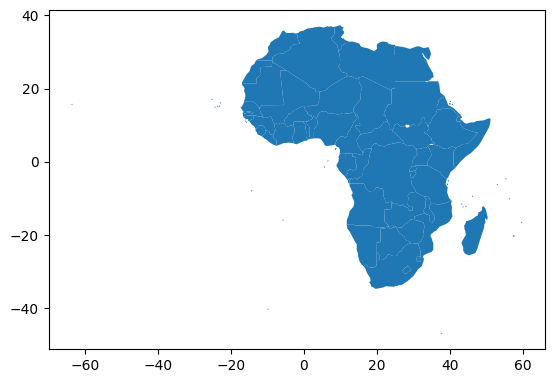

In [9]:
merged_geo_df.plot()

We might also check the Coordinate Reference System (CRS) to ensure that it has the same than the next datasets we are working with.  
If you want to combine various datasets that have different CRS, you would first need to reproject them to have the same projection.

In [10]:
merged_geo_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The country borders have the CRS "WGS 84" with the EPSG code 4326: https://epsg.io/4326
This is the classical Mercator projection you know from most world maps.

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/73/Mercator_projection_Square.JPG/1200px-Mercator_projection_Square.JPG" width="500"></center>

__________


## 5 Download Watersheds (HydroBASINS)

The second dataset that we need to download are the HydroBASINS from HydroSHEDS.  

HydroBASINS represents a series of vectorized polygon layers that depict sub-basin boundaries at a global scale. The goal of this product is to provide a seamless global coverage of consistently sized and hierarchically nested sub-basins at different scales (from tens to millions of square kilometers), supported by a coding scheme that allows for analysis of catchment topology such as up- and downstream connectivity. HydroBASINS has been extracted from the gridded HydroSHEDS core layers at 15 arc-second resolution.

<center>
    <figure>
        <img src="https://assets-global.website-files.com/602ebbdd5021f30e81efbad9/6206a1980637bc749b118407_Pfaf_figure_small.jpg" width="500">
        <figcaption>Depiction of nested sub-basin delineations</figcaption>
    </figure>
</center>


An important characteristic of any sub-basin delineation is the sub-basin breakdown, i.e. the decision of when and how to subdivide a larger basin into multiple tributary basins. At its highest level of sub-basin breakdown, HydroBASINS divides a basin into two sub-basins at every location where two river branches meet which each have an individual upstream area of at least 100 km². A second critical feature of sub-basin delineations is the way the sub-basins are grouped or coded to allow for the creation of nested sub-basins at different scales, or to navigate within the sub-basin network from up- to downstream. To support these functionalities and topological concepts, the ‘Pfafstetter’ coding system has been implemented in the HydroBASINS product offering 12 hierarchically nested sub-basin breakdowns globally.

In case you run this notebook several times for various configurations (resolution, Pfafstetter breakdown level, etc.), we first check whether we have already downloaded and extracted the HydroBASINS dataset to save some time.

In [11]:
file_name = "hybas_af_lev01-12_v1c.zip"

# Check if you have already downloaded the HydroBASINS
if not os.path.exists(file_name):

    # Download
    r = requests.get("https://data.hydrosheds.org/file/hydrobasins/standard/hybas_af_lev01-12_v1c.zip")
    with open(file_name, 'wb') as outfile:
        outfile.write(r.content)

    # Extract the ZIP-File
    with zipfile.ZipFile(file_name, 'r') as zip_ref:
        zip_ref.extractall()

After downloading the basins, we get one Shapefile for each of the twelve Pfafstetter breakdown levels. In the technical description that gets downloaded as well, you can get more information on the level of detail of each Pfafstetter breakdown.

In [12]:
class PDF(object):
    def __init__(self, pdf, size=(200,200)):
        self.pdf = pdf
        self.size = size

    def _repr_html_(self):
        return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

    def _repr_latex_(self):
        return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)
    
PDF(f'african_river_basins/HydroBASINS_TechDoc_v1c.pdf',size=(1200,500))

To get a nice visualization that is similar to the [Major River Basins of Africa](#basins_image), we choose the Pfafstetter breakdown level `2`.

In [13]:
# Find the Shapefile of the respective level
level = "02"
level_basin = glob(f"hybas_af_lev{level}_v1c.shp")[0]

In [14]:
# Read the Shapefile with GeoPandas
basin = gpd.read_file(level_basin)

Since we want to combine the basin dataset with the country borders, we want to check the CRS of the basins dataset to see whether it aligns with the reference system of the country borders.

In [15]:
basin.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Similar to the CRS of the country borders, the basins dataset also has the projection `WGS 84`.  
Hence, we do not need to reproject the dataset for the next steps.

Finally, let's have a look at the basins of level 2 by plotting them:

<Axes: >

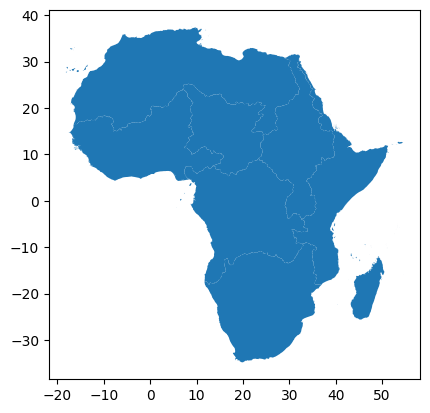

In [16]:
basin.plot()

__________


## 6 Intersect Country Borders with Basins

In this step, we want to combine the country borders with the basins. Besides getting country-specific information, it is also required in case a single country or a subset of countries shall be analyzed only.

For more information on GeoPandas `overlay` function, look [here](https://geopandas.org/en/stable/docs/user_guide/set_operations.html).

<center>
    <figure>
        <img src="https://geopandas.org/en/stable/_images/overlay_operations.png" width="800">
        <figcaption>Overlay Options</figcaption>
    </figure>
</center>

We choose the overlay option `intersect` to get only those geometries that are contained by both GeoDataFrames. 

In [17]:
country_basin = gpd.overlay(merged_geo_df, basin, how='intersection')

When plotting the result, we see the delineation of the basins again, but also a white gaps that represent the controversial borders of the countries South Sudan and Sudan as well as South Sudan and Kenya:

<Axes: >

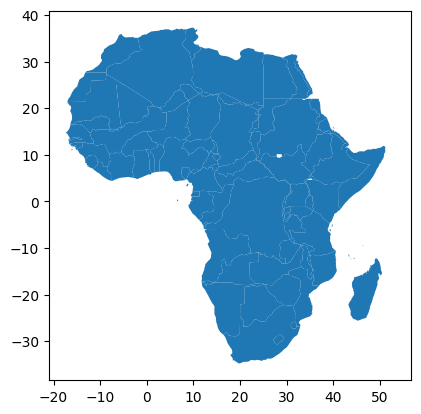

In [18]:
country_basin.plot(aspect=1)

__________

## 7 Download Rivers (HydroRIVERS)

Similar to the basins, we download and extract the rivers from the HydroSHEDS database.  
In case you run this notebook several times for various configurations (resolution, Pfafstetter breakdown level, etc.), we first check whether we have already downloaded and extracted the HydroBASINS dataset to save some time.

In [19]:
rivers_file_name = "af-rivers.zip"

# Check if you have already downloaded the HydroRIVERS
if not os.path.exists(rivers_file_name):

    # Download
    r = requests.get("https://data.hydrosheds.org/file/HydroRIVERS/HydroRIVERS_v10_af_shp.zip")
    with open(rivers_file_name, 'wb') as outfile:
        outfile.write(r.content)

    # Extract the ZIP-File
    with zipfile.ZipFile(rivers_file_name, 'r') as zip_ref:
        zip_ref.extractall()

Again, we read the Shapefile and check the CRS.

In [20]:
african_rivers = gpd.read_file("HydroRIVERS_v10_af_shp/HydroRIVERS_v10_af.shp")

In [21]:
african_rivers.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The CRS is alike the one used for country borders and basins, so again no reprojection is required.

__________

## 8 Intersect Country Borders and Basins with Rivers

Now, we intersect the rivers with the dataset that we have created so far and that already includes information on the countries as well as the basins.  
As a result, we get a dataset that contains information on basins as well as rivers over all African countries.

In [22]:
country_river_basin = gpd.overlay(african_rivers, country_basin, how='intersection')

__________

## 10 Plotting

Before visualizing our results, we create a new column in our dataset called `width`.  
This column will serve as the input for the linewidth parameter when plotting the rivers. Hence, the bigger the width parameter, the thicker the river line representation.

As indicator for the river width, we use the river flow `ORD_FLOW` from the HydroRIVERS to distinguish logarithmic size classes:
* order 1 represents river reaches with a long-term average discharge ≥ 100,000 m3/s
* order 2 represents river reaches with a long-term average discharge ≥ 10,000 m3/s and <100,000 m3/s
* ...
* order 9 represents river reaches with a long-term average discharge ≥ 0.001 m3/s and < 0.01 m3/s
* order 10 represents river reaches with a long-term average discharge < 0.001 m3/s (i.e., 0 in the provided data due to rounding to 3 digits).

In [23]:
def assign_river_width(row):
    if row['ORD_FLOW'] == 1:
        return 0.8
    elif row['ORD_FLOW'] == 2:
        return 0.7
    elif row['ORD_FLOW'] == 3:
        return 0.6
    elif row['ORD_FLOW'] == 4:
        return 0.45
    elif row['ORD_FLOW'] == 5:
        return 0.35
    elif row['ORD_FLOW'] == 6:
        return 0.25
    elif row['ORD_FLOW'] == 7:
        return 0.2
    elif row['ORD_FLOW'] == 8:
        return 0.15
    elif row['ORD_FLOW'] == 9:
        return 0.1
    else:
        return 0


country_river_basin['width'] = country_river_basin.apply(
    assign_river_width, axis=1)

We can see that the river is presented bigger (higher linewidth) when the `ORD_FLOW` parameter is smaller which means a higher discharge.  

Let's finally plot our river basins over Africa in a beuatiful way:

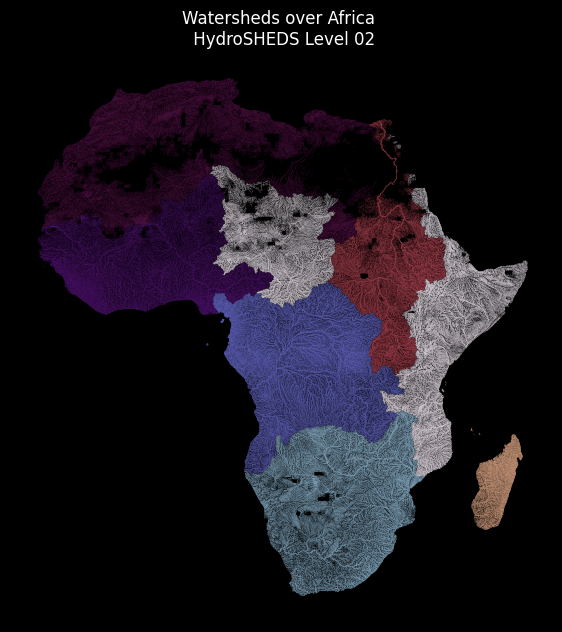

In [24]:
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(7, 7.75))
country_river_basin.plot(ax=ax, column='HYBAS_ID', cmap=colormaps['twilight'],
                         linewidth=country_river_basin['width'], 
                        #  edgecolor='black', 
                        #  alpha=country_river_basin['width'],
                         categorical=True,
                        #  legend=True
                        )
ax.set_axis_off()
plt.title(f"Watersheds over Africa \n HydroSHEDS Level {level}")
plt.show()

__________

## 10 Save your Results

You might as well want to save the plot we have created as well as the data that the plot is based on.  
To do this, you simply need to execute these final three commands:

In [25]:
result_file_name = f'africa_basins_lvl{level}'

In [26]:
fig.savefig(f'{result_file_name}.png', dpi=600,
            bbox_inches='tight', pad_inches=0, transparent=False)

In [27]:
country_river_basin.to_file(f"{result_file_name}.geojson", driver="GeoJSON")

<br>
<center> <h1>Congratulations!</h1> </center>
<center> <h2>You have successfully created River Basins over Africa</h2> </center>
<img src="https://dunia.esa.int/assets/DUNIA_icon-c174c3dd.png" style="margin-left: auto;">